In [ ]:
import pandas as pd
import numpy as np
import os
import cv2

#Step 1: Import the data. [ 3 points ]

###  To work in same Google Drive, right click on the "11_CStone_G10_CarDetect" and then click "Add shortcut to Drive".
 This will allow you to access the folder from your drive!

In [ ]:
from google.colab    import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#unziping Car Images
!unzip '/content/drive/MyDrive/11_CStone_G10_CarDetect/Car Images.zip' -d '/content/sample_data'

Streaming output truncated to the last 5000 lines.
  inflating: /content/sample_data/Car Images/Test Images/Chevrolet HHR SS 2010/02466.jpg  
  inflating: /content/sample_data/Car Images/Test Images/Chevrolet HHR SS 2010/01621.jpg  
  inflating: /content/sample_data/Car Images/Test Images/Acura RL Sedan 2012/01856.jpg  
  inflating: /content/sample_data/Car Images/Test Images/Chevrolet Cobalt SS 2010/00955.jpg  
  inflating: /content/sample_data/Car Images/Test Images/Chevrolet Cobalt SS 2010/02690.jpg  
  inflating: /content/sample_data/Car Images/Test Images/Chevrolet Cobalt SS 2010/01714.jpg  
  inflating: /content/sample_data/Car Images/Test Images/Acura RL Sedan 2012/00347.jpg  
  inflating: /content/sample_data/Car Images/Test Images/Chevrolet HHR SS 2010/01146.jpg  
  inflating: /content/sample_data/Car Images/Test Images/Chevrolet HHR SS 2010/01249.jpg  
  inflating: /content/sample_data/Car Images/Test Images/Acura RL Sedan 2012/00249.jpg  
  inflating: /content/sample_data/Ca

In [ ]:
#unziping Annotations
!unzip '/content/drive/MyDrive/11_CStone_G10_CarDetect/Annotations.zip' -d '/content/sample_data'


Archive:  /content/drive/MyDrive/11_CStone_G10_CarDetect/Annotations.zip
  inflating: /content/sample_data/Annotations/Train Annotations.csv  
  inflating: /content/sample_data/Annotations/Test Annotation.csv  


In [ ]:
#Reading All CSV files
train_csv = pd.read_csv('/content/sample_data/Annotations/Train Annotations.csv')
test_csv  = pd.read_csv('/content/sample_data/Annotations/Test Annotation.csv')
name_csv  = pd.read_csv('/content/drive/MyDrive/11_CStone_G10_CarDetect/Car names and make.csv', header = None)

In [ ]:
train_csv.head(3)

Image Name  Bounding Box coordinates  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0  00001.jpg                        39         116         569         375   
1  00002.jpg                        36         116         868         587   
2  00003.jpg                        85         109         601         381   

   Image class  
0           14  
1            3  
2           91

In [ ]:
test_csv.head(3)

Image Name  Bounding Box coordinates  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0  00001.jpg                        30          52         246         147   
1  00002.jpg                       100          19         576         203   
2  00003.jpg                        51         105         968         659   

   Image class  
0          181  
1          103  
2          145

In [ ]:
name_csv['body_type']          = name_csv[0].str.split(' ').str[-2]
name_csv['Year']               = name_csv[0].str.split(' ').str[-1]
name_csv['Manufacturer Name']  = name_csv[0].str.split(' ').str[0]

In [ ]:
name_csv.head()

0 body_type  Year Manufacturer Name
0  AM General Hummer SUV 2000       SUV  2000                AM
1         Acura RL Sedan 2012     Sedan  2012             Acura
2         Acura TL Sedan 2012     Sedan  2012             Acura
3        Acura TL Type-S 2008    Type-S  2008             Acura
4        Acura TSX Sedan 2012     Sedan  2012             Acura

#Step 2: Map training and testing images to its classes. [ 6 points ]

In [ ]:
def read_data(path): # function for Reading images for the folders.

    Image_File = []
    Car_Name = []
    Image_Name = []
    height = []
    width = []
    channels = []

    for car in os.listdir(os.path.join(path)):

      if car != '.DS_Store':   #Specific to Mac

         for img in os.listdir(os.path.join(path,car)):

           Image_Name.append(img)
           Car_Name.append(car)

           h,w,c = cv2.imread(os.path.join(path,car,img)).shape
           height.append(h)
           width.append(w)
           channels.append(c)

           Image_File.append(os.path.join(path,car,img)) # for maping image adress (to avoid ram problem, we can read and pre-process image later)

    df = pd.DataFrame(list(zip(Image_Name,Car_Name,Image_File,height,width,channels)),\
                      columns =['Image_Name','Car_Name','Image_File','height','width','channels'])

    return df

In [ ]:
path = '/content/sample_data/Car Images'

In [ ]:
train = read_data (os.path.join (path, 'Train Images'))
test  = read_data (os.path.join (path, 'Test Images'))

In [ ]:
train['body_type']         =  train['Car_Name'].str.split(' ').str[-2]
train['Year']              =  train['Car_Name'].str.split(' ').str[-1]
train['Manufacturer Name'] =  train['Car_Name'].str.split(' ').str[0]

test['body_type']          =  test['Car_Name'].str.split(' ').str[-2]
test['Year']               =  test['Car_Name'].str.split(' ').str[-1]
test['Manufacturer Name']  =  test['Car_Name'].str.split(' ').str[0]

In [ ]:
train.head()

Image_Name                              Car_Name  \
0  05023.jpg  Aston Martin Virage Convertible 2012   
1  01148.jpg  Aston Martin Virage Convertible 2012   
2  08085.jpg  Aston Martin Virage Convertible 2012   
3  08044.jpg  Aston Martin Virage Convertible 2012   
4  00405.jpg  Aston Martin Virage Convertible 2012   

                                          Image_File  height  width  channels  \
0  /content/sample_data/Car Images/Train Images/A...     408    640         3   
1  /content/sample_data/Car Images/Train Images/A...     352    610         3   
2  /content/sample_data/Car Images/Train Images/A...     477    717         3   
3  /content/sample_data/Car Images/Train Images/A...     455    680         3   
4  /content/sample_data/Car Images/Train Images/A...     349    645         3   

     body_type  Year Manufacturer Name  
0  Convertible  2012             Aston  
1  Convertible  2012             Aston  
2  Convertible  2012             Aston  
3  Convertible  2012             Aston  
4  Convertible  2012             Aston

In [ ]:
test.head()

Image_Name                              Car_Name  \
0  00158.jpg  Aston Martin Virage Convertible 2012   
1  05506.jpg  Aston Martin Virage Convertible 2012   
2  06848.jpg  Aston Martin Virage Convertible 2012   
3  05404.jpg  Aston Martin Virage Convertible 2012   
4  06237.jpg  Aston Martin Virage Convertible 2012   

                                          Image_File  height  width  channels  \
0  /content/sample_data/Car Images/Test Images/As...     427    640         3   
1  /content/sample_data/Car Images/Test Images/As...     567    900         3   
2  /content/sample_data/Car Images/Test Images/As...     330    440         3   
3  /content/sample_data/Car Images/Test Images/As...     400    600         3   
4  /content/sample_data/Car Images/Test Images/As...     294    413         3   

     body_type  Year Manufacturer Name  
0  Convertible  2012             Aston  
1  Convertible  2012             Aston  
2  Convertible  2012             Aston  
3  Convertible  2012             Aston  
4  Convertible  2012             Aston

#Step 3: Map training and testing images to its annotations. [ 6 points ]

In [ ]:
train_csv = train_csv.rename(columns={'Image Name': 'Image_Name','Bounding Box coordinates':'x1' ,
                                      'Unnamed: 2':'y1','Unnamed: 3':'x2',
                                      'Unnamed: 4':'y2','Image class':'Image_class'})

test_csv = test_csv.rename(columns={'Image Name': 'Image_Name','Bounding Box coordinates':'x1' ,
                                      'Unnamed: 2':'y1','Unnamed: 3':'x2',
                                      'Unnamed: 4':'y2','Image class':'Image_class'})

In [ ]:
train = pd.merge(train,train_csv,on='Image_Name')
test  = pd.merge(test,test_csv,on='Image_Name')

In [ ]:
train.to_csv ('/content/drive/MyDrive/11_CStone_G10_CarDetect/train_images.csv')
test.to_csv ('/content/drive/MyDrive/11_CStone_G10_CarDetect/test_images.csv')

In [ ]:
print(train.shape)
train.head(10)

(8041, 14)


Image_Name                              Car_Name  \
0  05023.jpg  Aston Martin Virage Convertible 2012   
1  01148.jpg  Aston Martin Virage Convertible 2012   
2  00405.jpg  Aston Martin Virage Convertible 2012   
3  00221.jpg  Aston Martin Virage Convertible 2012   
4  07386.jpg  Aston Martin Virage Convertible 2012   
5  00292.jpg  Aston Martin Virage Convertible 2012   
6  01506.jpg  Aston Martin Virage Convertible 2012   
7  03390.jpg  Aston Martin Virage Convertible 2012   
8  05143.jpg  Aston Martin Virage Convertible 2012   
9  00370.jpg  Aston Martin Virage Convertible 2012   

                                          Image_File  height  width  channels  \
0  /content/sample_data/Car Images/Train Images/A...     408    640         3   
1  /content/sample_data/Car Images/Train Images/A...     352    610         3   
2  /content/sample_data/Car Images/Train Images/A...     349    645         3   
3  /content/sample_data/Car Images/Train Images/A...     331    500         3   
4  /content/sample_data/Car Images/Train Images/A...    2448   3264         3   
5  /content/sample_data/Car Images/Train Images/A...     300    960         3   
6  /content/sample_data/Car Images/Train Images/A...    1200   1920         3   
7  /content/sample_data/Car Images/Train Images/A...     480    640         3   
8  /content/sample_data/Car Images/Train Images/A...     292    572         3   
9  /content/sample_data/Car Images/Train Images/A...     386    616         3   

     body_type  Year Manufacturer Name   x1   y1    x2   y2  Image_class  
0  Convertible  2012             Aston   26   72   774  480            1  
1  Convertible  2012             Aston   87  122   571  435          191  
2  Convertible  2012             Aston   48  114   547  432          186  
3  Convertible  2012             Aston  196   79   581  328          145  
4  Convertible  2012             Aston   51  117   698  399            6  
5  Convertible  2012             Aston   28   97   409  227           49  
6  Convertible  2012             Aston  135  193  1573  996          165  
7  Convertible  2012             Aston   81  165   542  453          155  
8  Convertible  2012             Aston   11   50   245  140          119  
9  Convertible  2012             Aston  134  121   929  515          133

In [ ]:
print(test.shape)
test.head(10)

(8041, 14)


Image_Name                              Car_Name  \
0  00158.jpg  Aston Martin Virage Convertible 2012   
1  05506.jpg  Aston Martin Virage Convertible 2012   
2  06848.jpg  Aston Martin Virage Convertible 2012   
3  05404.jpg  Aston Martin Virage Convertible 2012   
4  06237.jpg  Aston Martin Virage Convertible 2012   
5  01674.jpg  Aston Martin Virage Convertible 2012   
6  02374.jpg  Aston Martin Virage Convertible 2012   
7  07387.jpg  Aston Martin Virage Convertible 2012   
8  07989.jpg  Aston Martin Virage Convertible 2012   
9  07807.jpg  Aston Martin Virage Convertible 2012   

                                          Image_File  height  width  channels  \
0  /content/sample_data/Car Images/Test Images/As...     427    640         3   
1  /content/sample_data/Car Images/Test Images/As...     567    900         3   
2  /content/sample_data/Car Images/Test Images/As...     330    440         3   
3  /content/sample_data/Car Images/Test Images/As...     400    600         3   
4  /content/sample_data/Car Images/Test Images/As...     294    413         3   
5  /content/sample_data/Car Images/Test Images/As...     352    576         3   
6  /content/sample_data/Car Images/Test Images/As...     456    608         3   
7  /content/sample_data/Car Images/Test Images/As...     600    800         3   
8  /content/sample_data/Car Images/Test Images/As...     535    808         3   
9  /content/sample_data/Car Images/Test Images/As...     694   1024         3   

     body_type  Year Manufacturer Name   x1   y1    x2   y2  Image_class  
0  Convertible  2012             Aston   75  236  1196  846          179  
1  Convertible  2012             Aston   91  119   591  456          132  
2  Convertible  2012             Aston    2   24   255  138           74  
3  Convertible  2012             Aston   36   26   413  313           28  
4  Convertible  2012             Aston  169  165   707  501          105  
5  Convertible  2012             Aston  180   43   870  713          167  
6  Convertible  2012             Aston   20   45   234  166          136  
7  Convertible  2012             Aston   80   89   558  392           75  
8  Convertible  2012             Aston   10   32   292  181          190  
9  Convertible  2012             Aston    4   70   321  215          177

#Step 4: Display images with bounding box. [ 5 points ]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [ ]:
def display_random (data, n = 4):

  rand = np.random.randint(0, data.shape[0], n) # Generating n random numbers out of total number of flowers

  print ('Randomly selected image IDs : ', rand)

  fig , axes = plt.subplots(2, n ,figsize=(20, 5))

  color = (255, 0, 0) # red
  for i,j in enumerate(rand):

      ing_1 = cv2.imread(data['Image_File'].iloc[j]) # reading image

      axes[0,i].imshow(ing_1)  # showing the image

      axes[0,i].set_title("{}".format(data['Car_Name'].iloc[j])) # nameing the class

      p1 = (data['x1'].iloc[j],data['y1'].iloc[j]) # getting points x1,y1
      p2 = (data['x2'].iloc[j],data['y2'].iloc[j]) # getting points x2,y2

      ing_1 = cv2.rectangle(ing_1,p1,p2,color,thickness = 2) # drawing the bounding box.

      axes[1,i].imshow(ing_1 )  # showing the image with bounding box

  plt.show()

Randomly selected image IDs :  [3472 2549  413 4083]


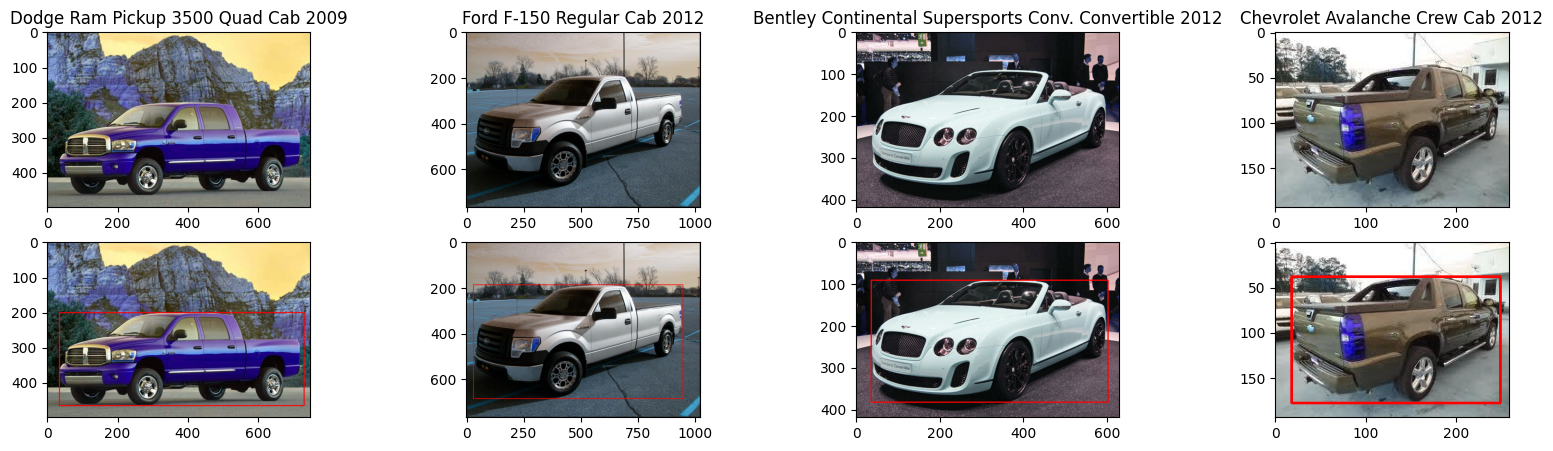

In [ ]:
display_random (train)

Randomly selected image IDs :  [3854 7290 5499 1158]


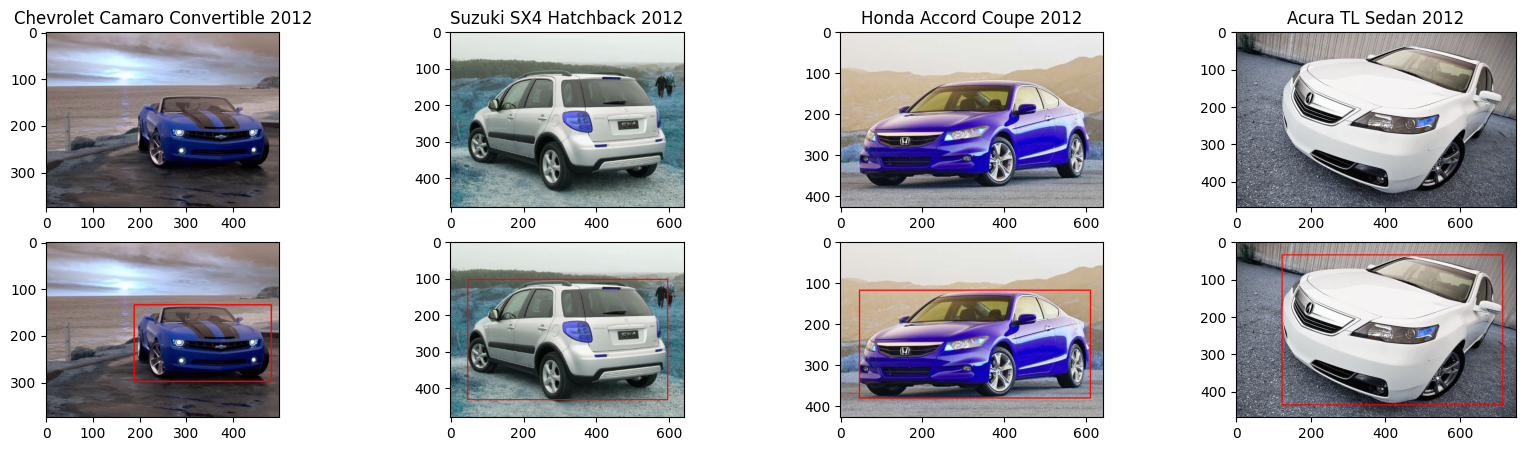

In [ ]:
display_random (test)

# Step 5: Exploratory Data Analysis

In [ ]:
train.describe()

height        width  channels           x1           y1  \
count  8144.000000  8144.000000    8144.0  8144.000000  8144.000000   
mean    482.771979   699.793099       3.0    64.906803   108.661223   
std     317.580021   450.922445       0.0    82.198684   104.551635   
min      57.000000    78.000000       3.0     1.000000     1.000000   
25%     290.000000   429.000000       3.0    19.000000    42.000000   
50%     424.000000   636.500000       3.0    39.000000    80.000000   
75%     540.000000   800.000000       3.0    79.000000   138.250000   
max    3744.000000  5616.000000       3.0  1648.000000  1508.000000   

                x2           y2  Image_class  
count  8144.000000  8144.000000  8144.000000  
mean    638.208620   416.431606    98.979371  
std     410.776734   273.786000    56.503148  
min      76.000000    47.000000     1.000000  
25%     392.000000   248.000000    50.000000  
50%     569.000000   360.000000    99.000000  
75%     746.250000   477.000000   148.000000  
max    5205.000000  3389.000000   196.000000

In [ ]:
test.describe()

height        width  channels           x1           y1  \
count  8041.000000  8041.000000    8041.0  8041.000000  8041.000000   
mean    483.749658   701.177092       3.0    65.057456   107.816192   
std     319.083857   455.601639       0.0    82.336438   108.052354   
min      41.000000    78.000000       3.0     1.000000     1.000000   
25%     289.000000   432.000000       3.0    19.000000    40.000000   
50%     426.000000   640.000000       3.0    39.000000    79.000000   
75%     549.000000   800.000000       3.0    78.000000   137.000000   
max    5400.000000  7800.000000       3.0  1048.000000  1651.000000   

                x2           y2  Image_class  
count  8041.000000  8041.000000  8041.000000  
mean    639.433777   417.301828    98.975501  
std     411.632197   274.659479    56.505578  
min      72.000000    41.000000     1.000000  
25%     395.000000   249.000000    51.000000  
50%     575.000000   364.000000    99.000000  
75%     748.000000   478.000000   148.000000  
max    7224.000000  3835.000000   196.000000

**Observation**
1. All the images have 3 channels(RGB) format.
2. In Train dataset most(50%) images have height around 425 and width 635
3. In Test dataset most(50%) images have height around 425 to 640
4. Both Train and Test image size are consistent in size


### Model Count by Manufacturer

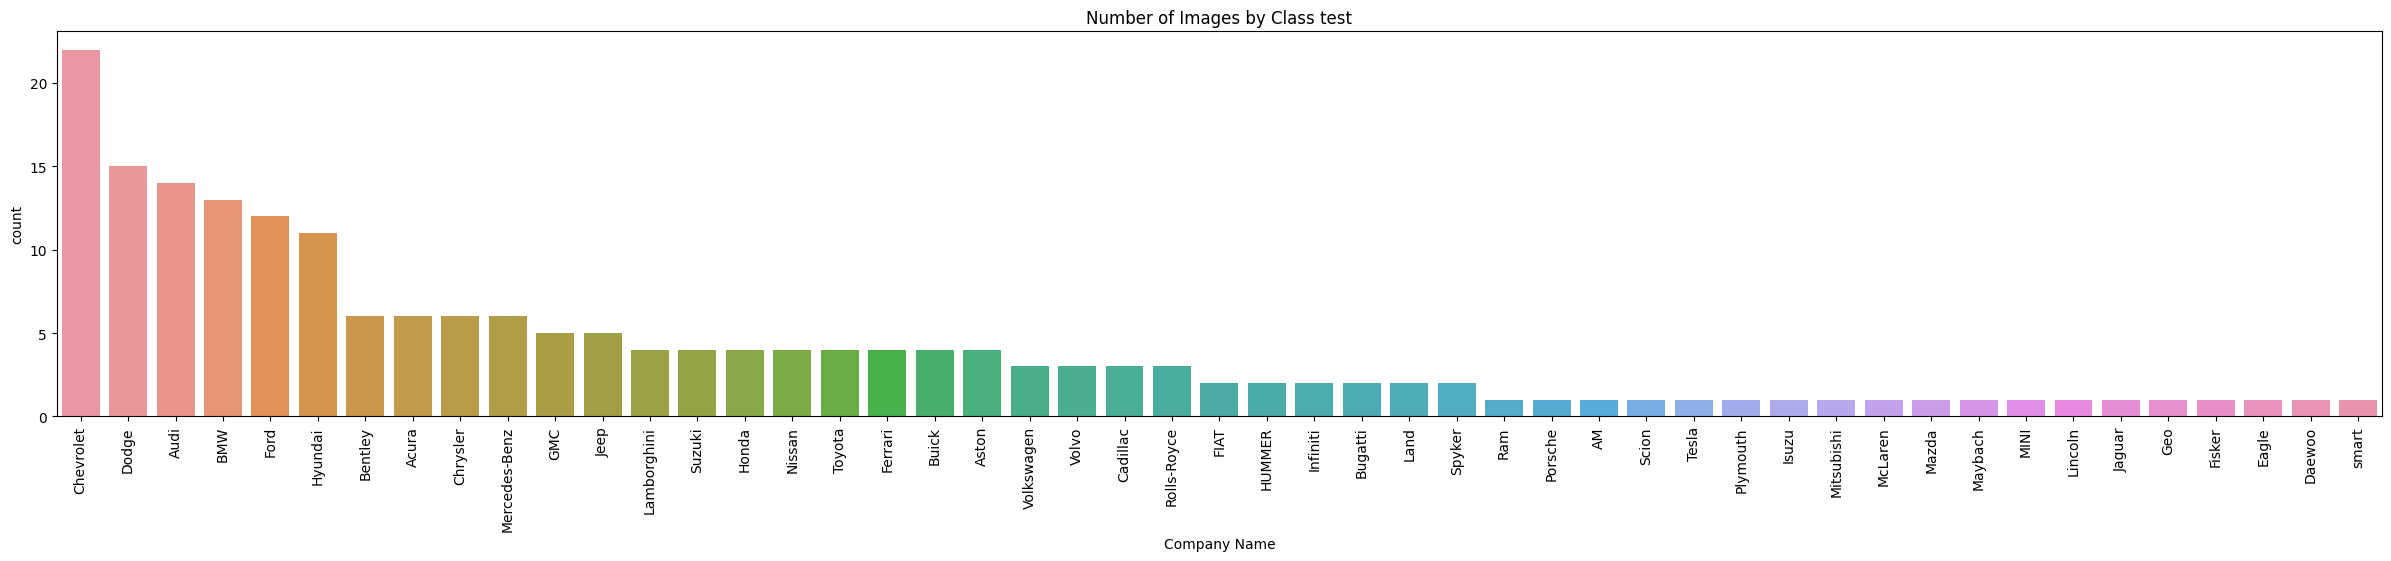

In [ ]:
plt.figure(figsize=(30, 5))
sns.countplot(data=name_csv, x='Manufacturer Name' ,order = name_csv['Manufacturer Name']\
              .value_counts().index).set_title('Car model Count by Manufacturer')
plt.xticks(rotation=90) # label rotarion 90 deegre
plt.show()

### Percent Distribution of Car Body Type for each Manufacturer

In [ ]:
df = train[['body_type','Manufacturer Name']].groupby('Manufacturer Name').value_counts()

In [ ]:
top_20 = name_csv['Manufacturer Name'].value_counts().index.tolist()[:20]

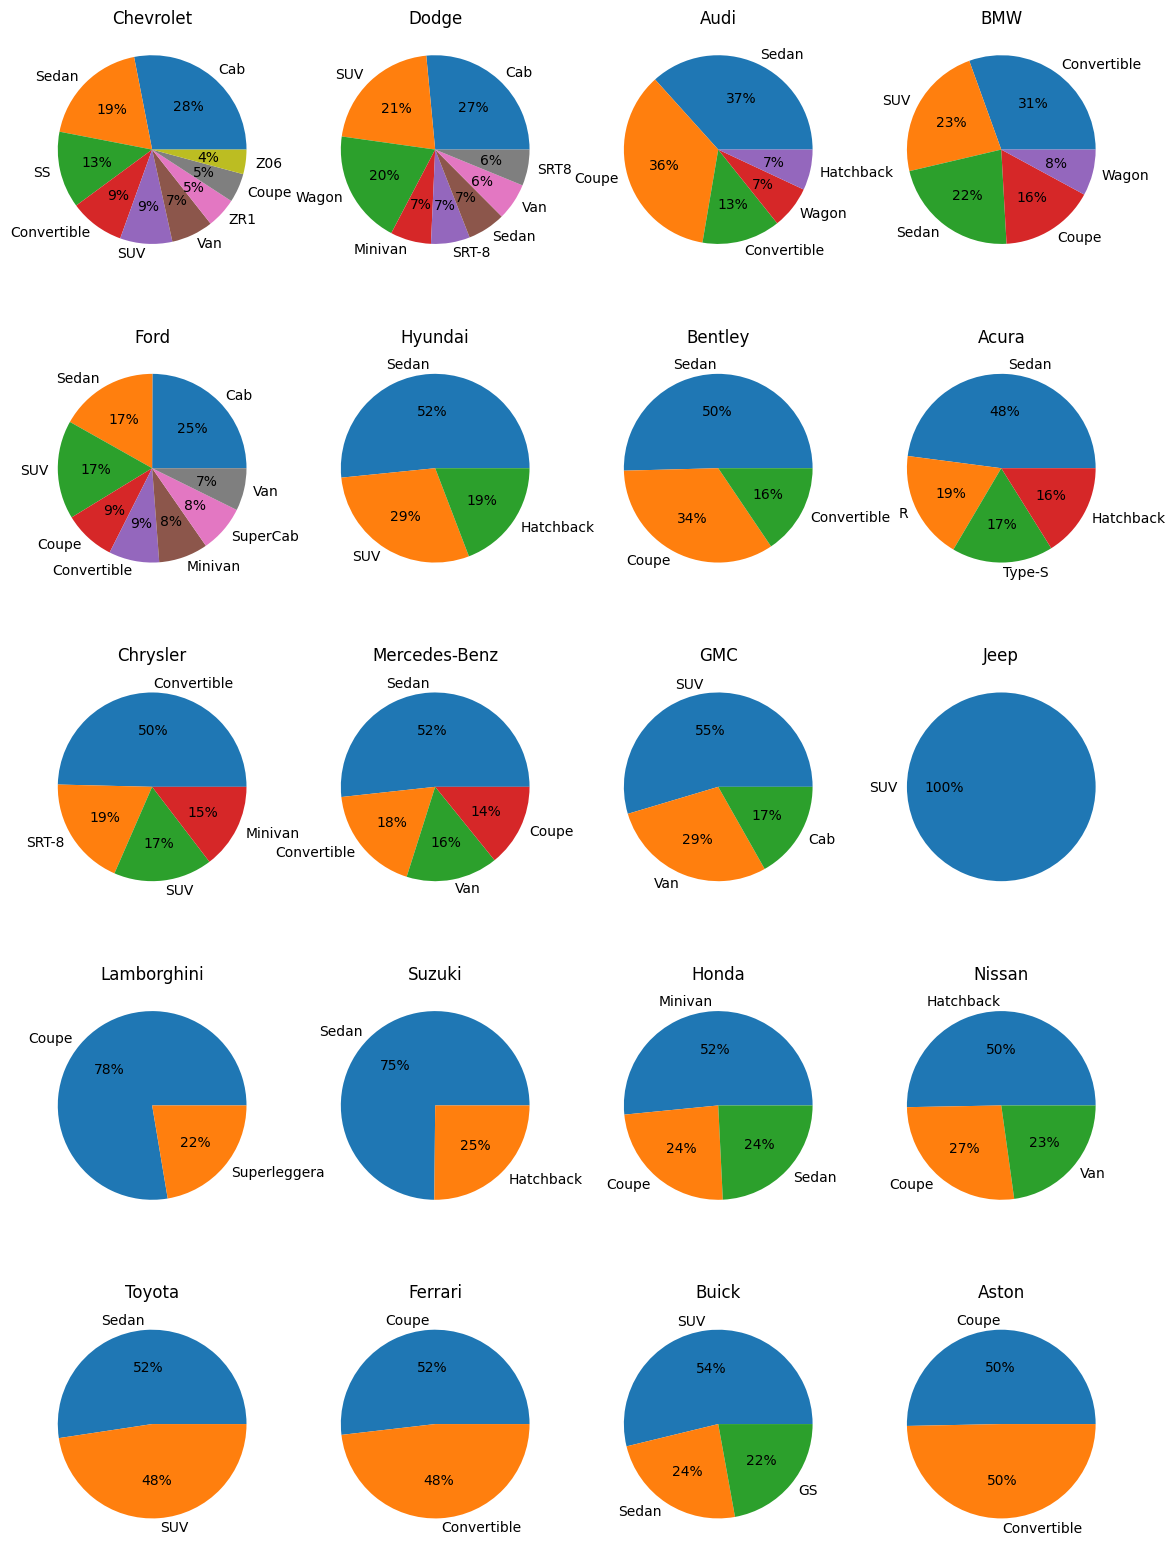

In [ ]:
palette_color = sns.color_palette('dark')
explode = [0, 0.1, 0, 0, 0]
fig , axes = plt.subplots(5, 4 ,figsize=(14, 20))

for i ,car in enumerate(top_20):
  ax = axes[i//4,i%4]
  data = df[car].tolist()
  inde = df[car].index
  ax.pie(data, labels=inde,
         autopct='%.0f%%')
  ax.set_title(car)

fig.subplots_adjust(wspace=.2)

plt.show()

### Images count Distribution for each Car Model

In [ ]:
train['Car_Name'].value_counts().sort_values(ascending=False)

GMC Savana Van 2012                                    68
Chrysler 300 SRT-8 2010                                49
Mitsubishi Lancer Sedan 2012                           48
Mercedes-Benz 300-Class Convertible 1993               48
Chevrolet Corvette ZR1 2012                            47
                                                       ..
Rolls-Royce Phantom Drophead Coupe Convertible 2012    31
Chevrolet Express Cargo Van 2007                       30
Maybach Landaulet Convertible 2012                     29
FIAT 500 Abarth 2012                                   28
Hyundai Accent Sedan 2012                              24
Name: Car_Name, Length: 196, dtype: int64

In [ ]:
test['Car_Name'].value_counts().sort_values(ascending=False)

GMC Savana Van 2012                                    68
Mercedes-Benz 300-Class Convertible 1993               48
Chrysler 300 SRT-8 2010                                48
Mitsubishi Lancer Sedan 2012                           47
Volkswagen Golf Hatchback 1991                         46
                                                       ..
Rolls-Royce Phantom Drophead Coupe Convertible 2012    30
Chevrolet Express Cargo Van 2007                       29
Maybach Landaulet Convertible 2012                     29
FIAT 500 Abarth 2012                                   27
Hyundai Accent Sedan 2012                              24
Name: Car_Name, Length: 196, dtype: int64

**Observation**

1. GMC savanvan 2012 have max number images

2. Hyundai accent sedan 2012 has least images

3. Most Models have 30-45 images (pretty balanced)

### Finding Car length and Height based on bouding co-ordinates to check feature relevance

In [ ]:
# Geting the Car length and Car height for the Annotations
train['car_length'] = train.apply(lambda x: (((x['x2']-x['x1']))) ,axis=1 )
train['car_height'] = train.apply(lambda x: (((x['y2']-x['y1']))) ,axis=1 )

test['car_length'] = test.apply(lambda x: (((x['x2']-x['x1']))) ,axis=1 )
test['car_height'] = test.apply(lambda x: (((x['y2']-x['y1']))) ,axis=1 )

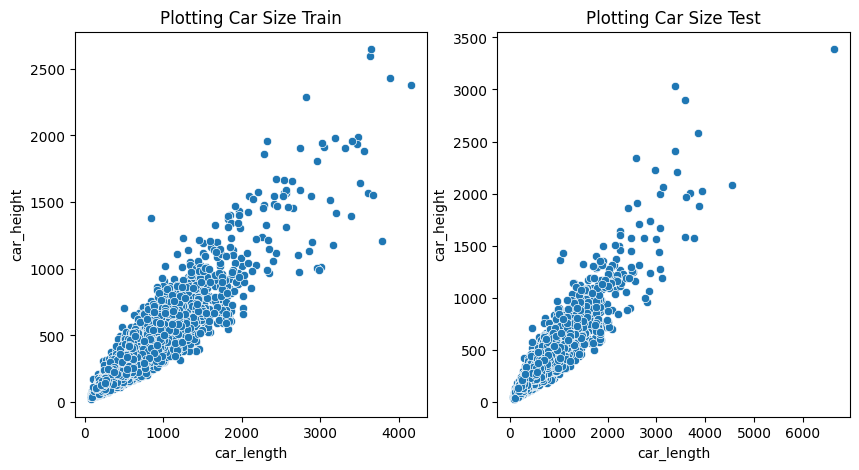

In [ ]:
fig , axes = plt.subplots(1, 2 ,figsize=(10, 5))
sns.scatterplot(data=train, x="car_length", y="car_height",ax=axes[0]).set_title('Plotting Car Size Train')
sns.scatterplot(data=test, x="car_length", y="car_height",ax=axes[1]).set_title('Plotting Car Size Test')
plt.show()

**Observation**
1. Length/Height of car in Train dataset are mostly in 1200-2000 range
2. Length/Height of car in Test dataset are mostly in 1200-2200 range
3. outliers are of bigger size on both Train and Test

In [ ]:
train['Bounding boxes/Orginal size'] = train.apply(lambda x: ((((x['x2']-x['x1'])*(x['y2']-x['y1']))/((x['height'])*(x['width'])))*100) ,axis=1 )
test['Bounding boxes/Orginal size'] = test.apply(lambda x: ((((x['x2']-x['x1'])*(x['y2']-x['y1']))/((x['height'])*(x['width'])))*100) ,axis=1 )

### **Finding ratio of Car feature within each image**.

### *We do this by calculating bounding dimension as a percentage of whole image size*

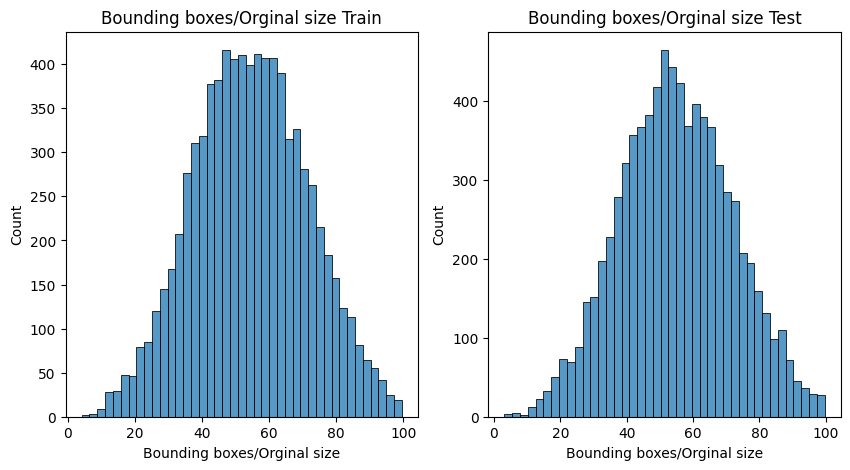

In [ ]:
fig , axes = plt.subplots(1, 2 ,figsize=(10, 5))
sns.histplot(data = train ,x ='Bounding boxes/Orginal size',ax=axes[0]).set_title('Bounding boxes/Orginal size Train')
sns.histplot(data = test ,x ='Bounding boxes/Orginal size',ax=axes[1]).set_title('Bounding boxes/Orginal size Test')
plt.show()

**Observation**
1. Car Dimension to Whole Image ratio is good both train and test.
2. 40%-65% of image is filled with car features.

#Step 6: **Preprocessing Images dataset for Model**

###Reading the image data via ImageDataGenerator
**Create Data Generator for the Images**

In [ ]:
img_width, img_height = 224, 224
nb_train_samples = 8144
nb_validation_samples = 8041
epochs = 15
batch_size = 32
n_classes = 196

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_data_dir = '/content/sample_data/Car Images/Train Images'
validation_data_dir = '/content/sample_data/Car Images/Train Images'

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    #shear_range=0.2,
    zoom_range=0.2,
    #fill_mode = 'constant',
    #cval = 1,
    rotation_range = 5,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 8144 images belonging to 196 classes.
Found 8144 images belonging to 196 classes.


### Design, train and test basic CNN models to classify the car

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense

cnn = Sequential()
#Adding 1st Convolution and Pooling Layer
cnn.add(Conv2D(32,kernel_size=(3,3),input_shape=(img_width,img_height,3),activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))
#Adding 2nd Convolution and Pooling Layer
cnn.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))
#Adding 3rd Convolution and Pooling Layer
cnn.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))
#Adding 4th Convolution and Pooling Layer
cnn.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))
#Adding 5th Convolution and Pooling Layer
cnn.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))

#Flatten
cnn.add(Flatten())

#Adding Input and Output Layer
cnn.add(Dense(units=256,activation='relu'))
cnn.add(Dense(units=256,activation='relu'))
cnn.add(Dense(units=256,activation='relu'))
cnn.add(Dense(units=196,activation='sigmoid'))

cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history_cnn = cnn.fit_generator(train_generator,
                            steps_per_epoch=100,
                            epochs=15,
                            validation_data=validation_generator,
                            validation_steps=50)




<ipython-input-28-12ef1b507df9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_cnn = cnn.fit_generator(train_generator,


Epoch 1/15
100/100 [==============================] - 423s 4s/step - loss: 5.2818 - accuracy: 0.0047 - val_loss: 5.2770 - val_accuracy: 0.0063
Epoch 2/15
100/100 [==============================] - 414s 4s/step - loss: 5.2726 - accuracy: 0.0082 - val_loss: 5.2764 - val_accuracy: 0.0113
Epoch 3/15
100/100 [==============================] - 384s 4s/step - loss: 5.2773 - accuracy: 0.0084 - val_loss: 5.2774 - val_accuracy: 0.0075
Epoch 4/15
100/100 [==============================] - 411s 4s/step - loss: 5.2765 - accuracy: 0.0069 - val_loss: 5.2754 - val_accuracy: 0.0037
Epoch 5/15
100/100 [==============================] - 384s 4s/step - loss: 5.2743 - accuracy: 0.0066 - val_loss: 5.2576 - val_accuracy: 0.0106
Epoch 6/15
100/100 [==============================] - 420s 4s/step - loss: 5.2301 - accuracy: 0.0103 - val_loss: 5.2313 - val_accuracy: 0.0106
Epoch 7/15
100/100 [==============================] - 379s 4s/step - loss: 5.1926 - accuracy: 0.0106 - val_loss: 5.1360 - val_accuracy: 0.0162

Text(0.5, 1.0, 'Training and validation loss')

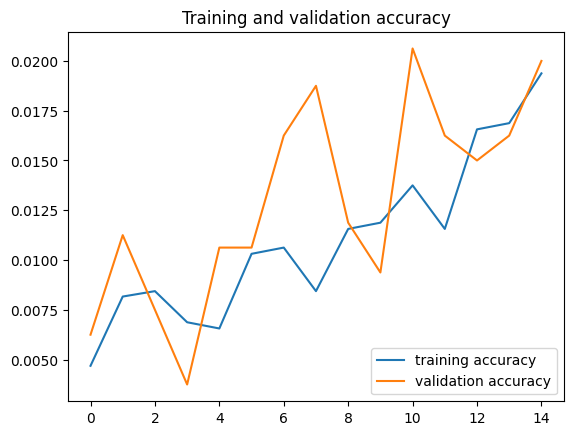

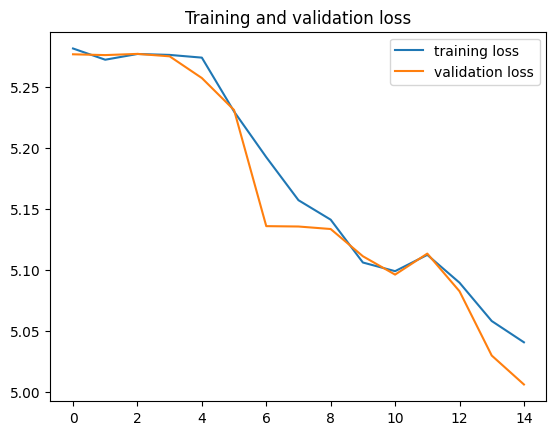

In [ ]:
# Evaluate and share insights on performance of the model with 15 epoch
import matplotlib.pyplot as plt


accuracy = history_cnn.history['accuracy']
val_accuracy = history_cnn.history['val_accuracy']
loss     = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

### VGG16 implementation

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

model = Sequential()
model.add(Conv2D(input_shape=(img_width,img_height,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
#model.add(Dense(len(class_names), activation="softmax"))
model.add(Dense(196, activation="softmax"))

from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 conv2d_6 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications import VGG16

# Number of classes in your dataset
num_classes = 196

# Create VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data generators
train_datagen = ImageDataGenerator(...)
validation_datagen = ImageDataGenerator(...)

train_generator = train_datagen.flow_from_directory(
    '/content/sample_data/Car Images/Train Images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/sample_data/Car Images/Test Images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Training
history_vgg = model.fit_generator(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=50
)



Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


<ipython-input-38-5fe8e257f30a>:40: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_vgg = model.fit_generator(
/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/5
255/255 [==============================] - 170s 561ms/step - loss: 5.8060 - accuracy: 0.0059 - val_loss: 5.2769 - val_accuracy: 0.0075
Epoch 2/5
255/255 [==============================] - 133s 522ms/step - loss: 5.3236 - accuracy: 0.0076 - val_loss: 5.2763 - val_accuracy: 0.0063
Epoch 3/5
255/255 [==============================] - 133s 521ms/step - loss: 5.4117 - accuracy: 0.0085 - val_loss: 5.2753 - val_accuracy: 0.0088
Epoch 4/5
255/255 [==============================] - 133s 520ms/step - loss: 5.2763 - accuracy: 0.0085 - val_loss: 5.2757 - val_accuracy: 0.0081
Epoch 5/5
255/255 [==============================] - 130s 509ms/step - loss: 5.2884 - accuracy: 0.0081 - val_loss: 5.2768 - val_accuracy: 0.0044


Text(0.5, 1.0, 'Training and validation loss')

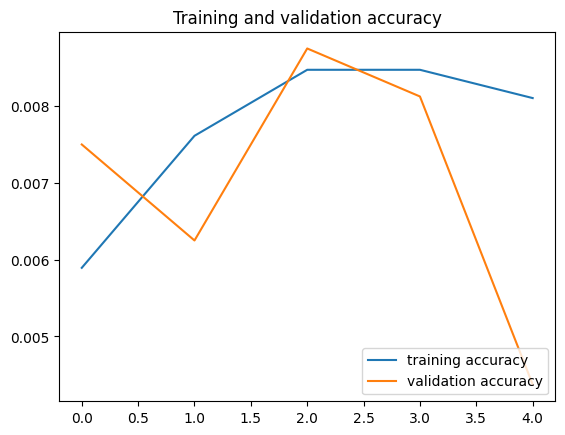

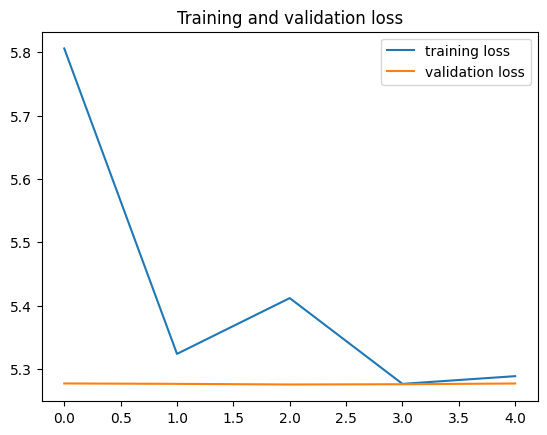

In [ ]:
# Evaluate and share insights on performance of the model with 5 epoch
import matplotlib.pyplot as plt


accuracy = history_vgg.history['accuracy']
val_accuracy = history_vgg.history['val_accuracy']
loss     = history_vgg.history['loss']
val_loss = history_vgg.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')


# **Milestone 2 : Preprocessed output from Milestone-1**

VGG16 (Fine tune the trained basic CNN models to classify the car)

In [ ]:
from keras.applications import VGG16
from keras.callbacks import ModelCheckpoint, EarlyStopping
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
checkpoint = ModelCheckpoint("vgg16.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

In [ ]:
# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = True
    set_trainable= False
    if layer.name in ["block5_con1","block4_conv1"]:
        set_trainable = True
    if set_trainable:
        layer.trainable= True
    else:
        layer.trainable = False

In [ ]:
# Add a new fully connected layer for the output

x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
#x = Dropout(0.7)(x)
x = Dense(64, activation='relu')(x)
#x = Dropout(0.7)(x)
x = Dense(32, activation='relu')(x)
#x = Dropout(0.7)(x)
x = Dense(4, activation='sigmoid',name="bounding_box")(x)
#x = Dropout(0.7)(x)

#
x = Dense(512,activation="relu")(x)
x = Dropout(0.5)(x)
x= Dense(512,activation="relu")(x)
x= Dropout(0.5)(x)
output = Dense(196, name="class_label", activation='softmax')(x)

In [ ]:
# Create the fine-tuned model
from keras.models import Model
from keras.optimizers import Adam

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(lr=0.005), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_vgg = model.fit_generator(train_generator,
                    epochs = 10,
                    validation_data = validation_generator,
                    validation_steps = 50,callbacks=[checkpoint,early])

<ipython-input-67-2a6ab174437c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_vgg = model.fit_generator(train_generator,


Epoch 1/10
255/255 [==============================] - ETA: 0s - loss: 5.2883 - accuracy: 0.0055
Epoch 1: val_accuracy improved from -inf to 0.00687, saving model to vgg16.h5
255/255 [==============================] - 111s 430ms/step - loss: 5.2883 - accuracy: 0.0055 - val_loss: 5.2755 - val_accuracy: 0.0069
Epoch 2/10
255/255 [==============================] - ETA: 0s - loss: 5.2792 - accuracy: 0.0083
Epoch 2: val_accuracy did not improve from 0.00687
255/255 [==============================] - 108s 424ms/step - loss: 5.2792 - accuracy: 0.0083 - val_loss: 5.2743 - val_accuracy: 0.0056
Epoch 3/10
255/255 [==============================] - ETA: 0s - loss: 5.2783 - accuracy: 0.0083
Epoch 3: val_accuracy improved from 0.00687 to 0.00938, saving model to vgg16.h5
255/255 [==============================] - 106s 416ms/step - loss: 5.2783 - accuracy: 0.0083 - val_loss: 5.2716 - val_accuracy: 0.0094
Epoch 4/10
255/255 [==============================] - ETA: 0s - loss: 5.2781 - accuracy: 0.0083
E

Text(0.5, 1.0, 'Training and validation loss')

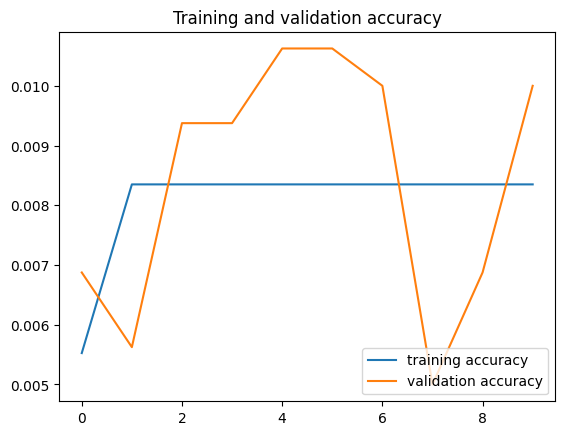

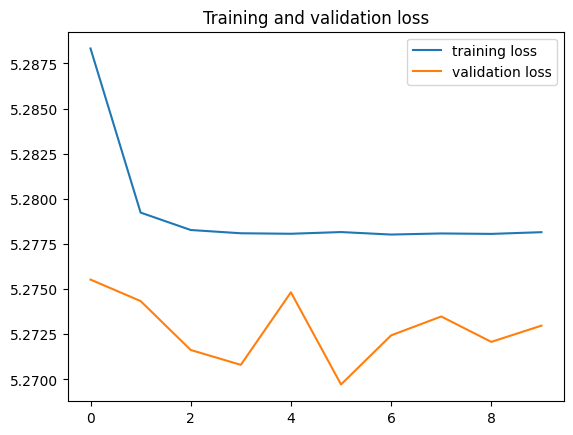

In [ ]:
# Evaluate and share insights on performance of the model with 30 epoch
import matplotlib.pyplot as plt


accuracy = history_vgg.history['accuracy']
val_accuracy = history_vgg.history['val_accuracy']
loss     = history_vgg.history['loss']
val_loss = history_vgg.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

###RCNN

In [ ]:
# Function to calculate Intersection over union (IOU)
def calculate_iou(bb_1, bb_2):
    '''
  Now we are initialising the function to calculate IOU (Intersection Over Union)
  of the ground truth box from the box computed by selective search.
  To divide the generated ROI’s, for example, we can use a metric called IoU.
  It’s defined as the intersection area divided by area of the union of a predicted
  bounding box and ground-truth box.
  '''

    assert bb_1['x1'] < bb_1['x2']    # The assert keyword lets you test if a condition in your code returns True,
    assert bb_1['y1'] < bb_1['y2']    # if not, the program will raise an AssertionError.
    assert bb_2['x1'] < bb_2['x2']
    assert bb_2['y1'] < bb_2['y2']

    x_left = max(bb_1['x1'], bb_2['x1'])
    y_top = max(bb_1['y1'], bb_2['y1'])
    x_right = min(bb_1['x2'], bb_2['x2'])
    y_bottom = min(bb_1['y2'], bb_2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection = (x_right - x_left) * (y_bottom - y_top)

    bb_1_area = (bb_1['x2'] - bb_1['x1']) * (bb_1['y2'] - bb_1['y1'])
    bb_2_area = (bb_2['x2'] - bb_2['x1']) * (bb_2['y2'] - bb_2['y1'])

    iou_value = intersection / float(bb_1_area + bb_2_area - intersection)
    assert iou_value >= 0.0
    assert iou_value <= 1.0
    return iou_value

In [ ]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from cv2 import ximgproc

cv2.setUseOptimized(True);
ss_object = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

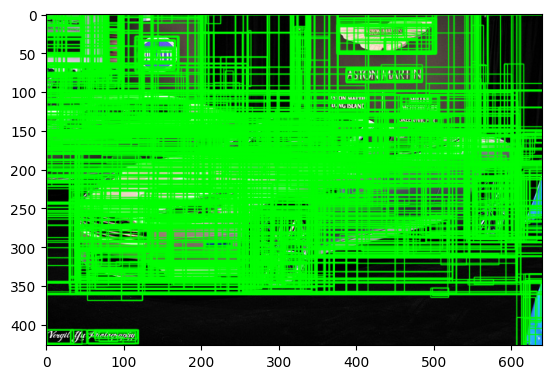

In [ ]:
input_image = cv2.imread(test.loc[0]['Image_File'])
ss_object.setBaseImage(input_image)
ss_object.switchToSelectiveSearchFast()  #this method of createSelectiveSearchSegmentation()
rects = ss_object.process()    # The output of the process is a set of a potential ROI’s, depending on the size of the base image
new_input_image = input_image.copy() # create copy of the base image
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
    cv2.rectangle(new_input_image, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
# plt.figure()
plt.imshow(new_input_image)

In [ ]:

import cv2

MAX_REGION_PROPOSALS = 2000
train_data = []
train_labels_data = []

#for i in range(len(train)):
for i in range(100):
  print(i)
  try:
    image_name = train.loc[i, "Image_File"]
    image = cv2.imread(image_name)
    x1 = train.loc[i, "x1"]
    y1 = train.loc[i, "y1"]
    x2 = train.loc[i, "x2"]
    y2 = train.loc[i, "y2"]
    coordinates = []
    coordinates.append({"x1": x1, "x2": x2, "y1": y1, "y2": y2})
    ss_object.setBaseImage(image)
    ss_object.switchToSelectiveSearchFast()
    ss_results = ss_object.process()
    image_new = image.copy()
    min_positive_samples = 0
    min_negative_samples = 0
    flag = 0
    foreground_flag = 0
    background_flag = 0
    for region, ss_coordinate in enumerate(ss_results):
      if region < MAX_REGION_PROPOSALS and flag == 0:
        for value in coordinates:
          x, y, w, h = ss_coordinate
          iou = calculate_iou(value, {"x1": x, "x2": x+w, "y1": y, "y2": y+h})
          if min_positive_samples < 30:
            if iou > 0.70:
               mobile_obj_img = image_new[y1:y1+y2, x1:x1+x2]
               resized_image = cv2.resize(mobile_obj_img, (224, 224), interpolation=cv2.INTER_AREA)
               train_data.append(resized_image)
               train_labels_data.append(1)
               min_positive_samples += 1
          else:
            foreground_flag = 1
          if min_negative_samples < 30:
            if iou < 0.3:
              mobile_obj_img = image_new[y:y+h, x:x+w]
              resized_image = cv2.resize(mobile_obj_img, (224, 224), interpolation=cv2.INTER_AREA)
              train_data.append(resized_image)
              train_labels_data.append(0)
              min_negative_samples += 1
          else:
            background_flag = 1
        if foreground_flag == 1 and background_flag == 1:
          print("inside")
          flag = 1
  except Exception as e:
        print(e)
        continue


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
inside
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [ ]:

import cv2

MAX_REGION_PROPOSALS = 2000
test_data = []
test_labels_data = []

#for i in range(len(test)):
for i in range(100):
  print(i)
  try:
    image_name = test.loc[i, "Image_File"]
    image = cv2.imread(image_name)
    x1 = test.loc[i, "x1"]
    y1 = test.loc[i, "y1"]
    x2 = test.loc[i, "x2"]
    y2 = test.loc[i, "y2"]
    coordinates = []
    coordinates.append({"x1": x1, "x2": x2, "y1": y1, "y2": y2})
    ss_object.setBaseImage(image)
    ss_object.switchToSelectiveSearchFast()
    ss_results = ss_object.process()
    image_new = image.copy()
    min_positive_samples = 0
    min_negative_samples = 0
    flag = 0
    foreground_flag = 0
    background_flag = 0
    for region, ss_coordinate in enumerate(ss_results):
      if region < MAX_REGION_PROPOSALS and flag == 0:
        for value in coordinates:
          x, y, w, h = ss_coordinate
          iou = calculate_iou(value, {"x1": x, "x2": x+w, "y1": y, "y2": y+h})
          if min_positive_samples < 30:
            if iou > 0.70:
               mobile_obj_img = image_new[y1:y1+y2, x1:x1+x2]
               resized_image = cv2.resize(mobile_obj_img, (224, 224), interpolation=cv2.INTER_AREA)
               test_data.append(resized_image)
               test_labels_data.append(1)
               min_positive_samples += 1
          else:
            foreground_flag = 1
          if min_negative_samples < 30:
            if iou < 0.3:
              mobile_obj_img = image_new[y:y+h, x:x+w]
              resized_image = cv2.resize(mobile_obj_img, (224, 224), interpolation=cv2.INTER_AREA)
              test_data.append(resized_image)
              test_labels_data.append(0)
              min_negative_samples += 1
          else:
            background_flag = 1
        if foreground_flag == 1 and background_flag == 1:
          print("inside")
          flag = 1
  except Exception as e:
        print(e)
        continue


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [ ]:
# train_data=[] will contain all the images and
# train_labels_data=[] will contain all the labels marking airplane images as 1 and non airplane images (i.e. background images) as 0.
X_train = np.array(train_data)
y_train = np.array(train_labels_data)
print(X_train.shape)
print(y_train.shape)

(3931, 224, 224, 3)
(3931,)


In [ ]:
X_test = np.array(test_data)
y_test = np.array(test_labels_data)
print(X_test.shape)
print(y_test.shape)

(3658, 224, 224, 3)
(3658,)


In [ ]:
from sklearn.preprocessing import LabelBinarizer

class My_Label_Binarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

lb_object = My_Label_Binarizer()
y_train =  lb_object.fit_transform(y_train)
y_test =  lb_object.fit_transform(y_test)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3931, 224, 224, 3) (3658, 224, 224, 3) (3931, 2) (3658, 2)


In [ ]:
# Now we will use Keras ImageDataGenerator to pass the dataset to the model.
# We will do some augmentation on the dataset like horizontal flip, vertical flip and rotation to increase the dataset.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
train_data = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
test_data = tsdata.flow(x=X_test, y=y_test)

In [ ]:
# Now we will do transfer learning on the imagenet weight. We will import VGG16 model and also put the imagenet weight in the model.

from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam


vgg_model = VGG16(weights='imagenet', include_top=True)
vgg_model.summary()

for layers in (vgg_model.layers)[:15]:
    print(layers)
    layers.trainable = False
x = vgg_model.layers[-2].output
x = Dense(2, activation="softmax")(x)
model = Model(inputs = vgg_model.input, outputs = x)
opt = Adam(lr=0.0001)
model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics=["accuracy"])
model.summary()

553467096/553467096 [==============================] - 26s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoints = ModelCheckpoint("ieeercnn_vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq="epoch")
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=100, verbose=1, mode='auto')

In [ ]:
history = model.fit(train_data, steps_per_epoch= 10, epochs= 3, validation_data= test_data, validation_steps=2, callbacks=[checkpoints,early])

Epoch 1/3
10/10 [==============================] - ETA: 0s - loss: 151.0459 - accuracy: 0.6156
Epoch 1: val_accuracy improved from -inf to 0.20312, saving model to ieeercnn_vgg16_1.h5
10/10 [==============================] - 60s 4s/step - loss: 151.0459 - accuracy: 0.6156 - val_loss: 28.3952 - val_accuracy: 0.2031
Epoch 2/3
10/10 [==============================] - ETA: 0s - loss: 8.7631 - accuracy: 0.5562
Epoch 2: val_accuracy improved from 0.20312 to 0.65625, saving model to ieeercnn_vgg16_1.h5
10/10 [==============================] - 110s 12s/step - loss: 8.7631 - accuracy: 0.5562 - val_loss: 0.6975 - val_accuracy: 0.6562
Epoch 3/3
10/10 [==============================] - ETA: 0s - loss: 1.9307 - accuracy: 0.7219
Epoch 3: val_accuracy improved from 0.65625 to 0.73438, saving model to ieeercnn_vgg16_1.h5
10/10 [==============================] - 210s 23s/step - loss: 1.9307 - accuracy: 0.7219 - val_loss: 0.6876 - val_accuracy: 0.7344


Text(0.5, 1.0, 'Training and validation loss')

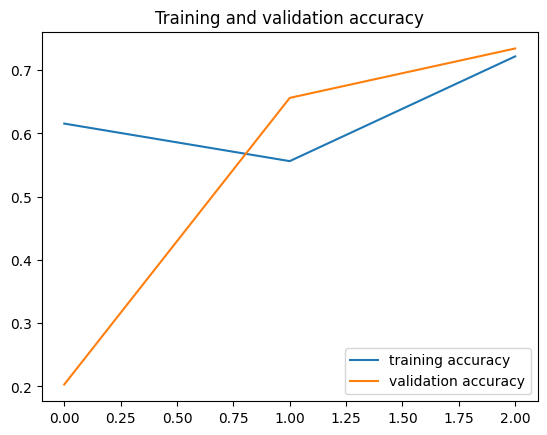

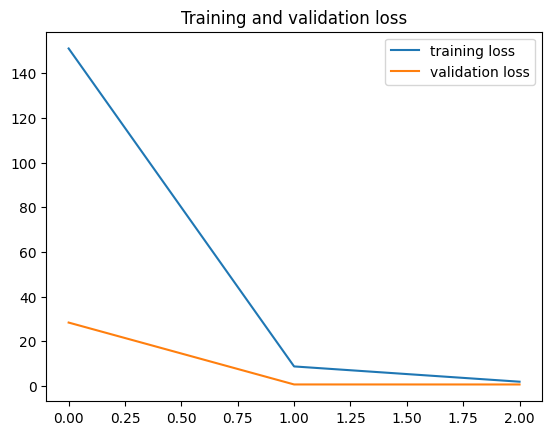

In [ ]:
# Evaluate and share insights on performance of the model with 30 epoch
import matplotlib.pyplot as plt


accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

1/1 [==============================] - 2s 2s/step
It is not car


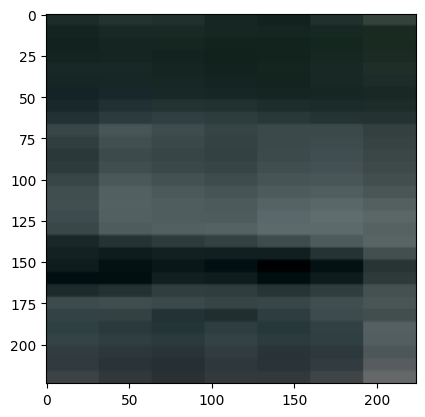

In [ ]:
img = X_test[400]
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result = model.predict(img)
if result[0][0] > result[0][1]:
    print("Its a car")
else:
    print("It is not car")

In [ ]:
from tensorflow.keras.models import load_model
model.save("rcnn_model")
model.save_weights("rcnn_weights.h5")

### Faster RCNN

In [ ]:
!pip install gluoncv
!pip install mxnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install torch==1.13.1+cu116 torchvision==0.14.1+cu116 torchaudio==0.13.1 --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116
  Using cached https://download.pytorch.org/whl/cu116/torch-1.13.1%2Bcu116-cp310-cp310-linux_x86_64.whl (1977.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 39.3 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1+cu118
    Uninstalling torch-2.0.1+cu118:
      Successfully uninstalled torch-2.0.1+cu118
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.2+cu118
    Uninstalling torchvision-0.15.2+cu118:
      Successfully uninstalled torchvision-0.15.2+cu118
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.0.2+cu118
    Uninstalling torchaudio-2.0.2+cu118:
      Successfully uninstalled torchaudio-2.0.2+cu118
ERROR: pip's dependency resolver does no

In [ ]:
# import libraries
import cv2          #for image processing
import numpy as np
from matplotlib import pyplot as plt      #for plotting purposes                        #matrix operations
import mxnet as mx
import gluoncv
from gluoncv import model_zoo, data, utils
from google.colab.patches import cv2_imshow   #plotting in google colab, equivalent of cv2.imshow

/usr/local/lib/python3.10/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.1` and `torch==1.13.1+cu116` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


In [ ]:
net = model_zoo.get_model('faster_rcnn_resnet50_v1b_voc', pretrained=True)
# get pretrained Faster RCNN with Resnet50 as base model v3 model from model_zoo class of gluoncv

121888KB [00:04, 25301.74KB/s]


In [ ]:
def detect_and_label(rgb_frame):
    final_array = mx.nd.array(rgb_frame)        # convert the video frame into mxnet numpy array
    x, img = gluoncv.data.transforms.presets.rcnn.transform_test(final_array)     # transform the array for model input shape
    class_IDs, scores, bounding_boxes = net(x)            # get the class Ids, confidence scores and bounding boxes by passing the array through the model
    ax = utils.viz.plot_bbox(img, bounding_boxes[0], scores[0],
                             class_IDs[0], class_names=net.classes) # create an axis object with the information and respective classes
    # plt.rcParams['figure.figsize'] = [80, 50]
    plt.show(block=False)
    plt.pause(0.0001)
    plt.close()       # I've plotted it this way to stop the plt.show from blocking the next video frame so you can view results
                      # in real time. However, this will depend on how much fps your system supports.


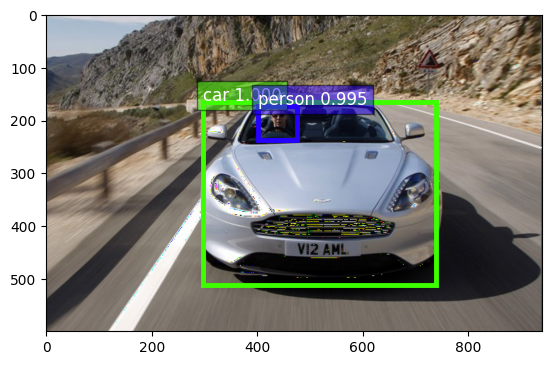

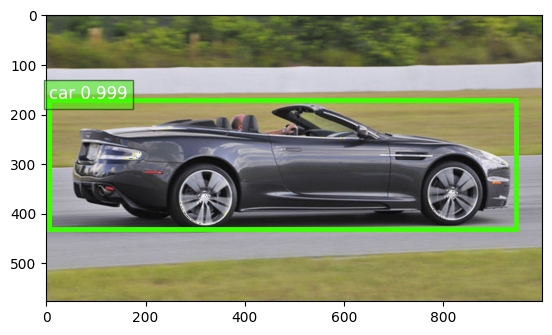

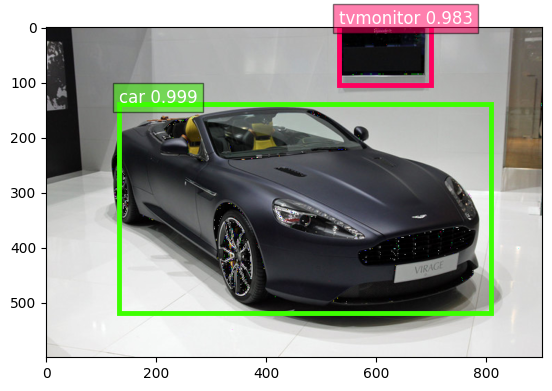

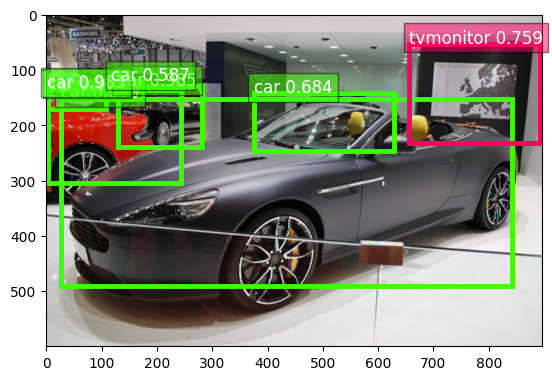

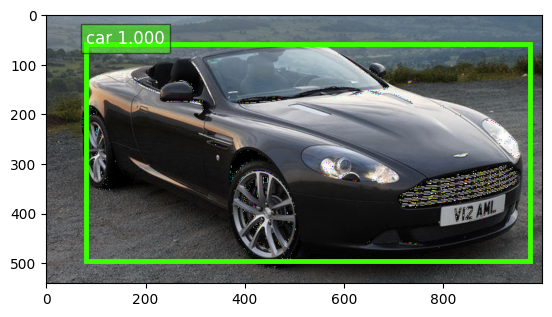

In [ ]:
#Object detection from train folder images
def do_object_detection_trainImg():
    for i in range(5):
      image_name = train.loc[i, "Image_File"]
      image = cv2.imread(image_name)
      rgb_frame = image[:, :, ::-1]
      detect_and_label(rgb_frame)
    cv2.destroyAllWindows()       # handle interrupts

do_object_detection_trainImg()

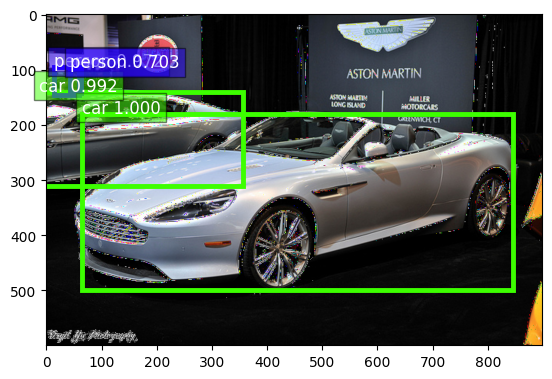

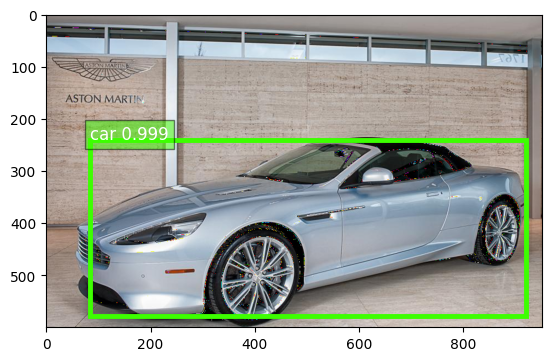

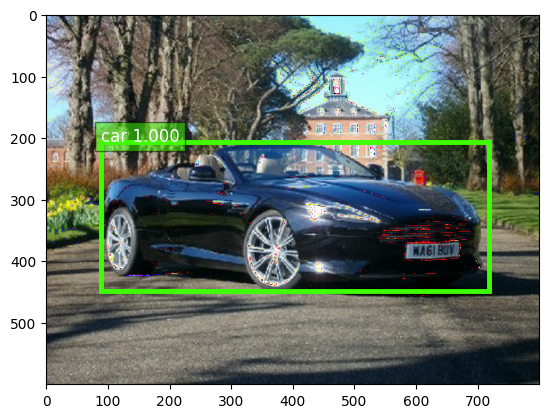

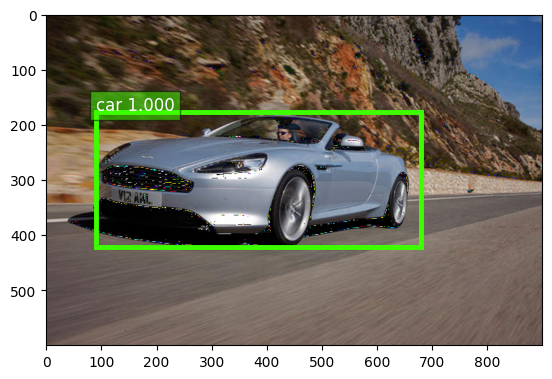

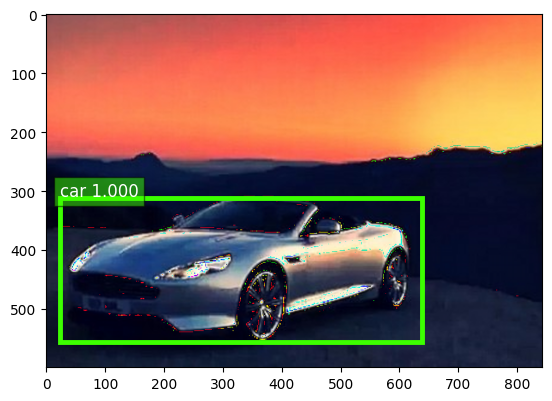

In [ ]:
#Object detection from test folder images
def do_object_detection_testImg():
    for i in range(5):
      image_name = test.loc[i, "Image_File"]
      image = cv2.imread(image_name)
      rgb_frame = image[:, :, ::-1]
      detect_and_label(rgb_frame)
    cv2.destroyAllWindows()       # handle interrupts

do_object_detection_testImg()

### MASK RCNN

In [ ]:
!git clone https://github.com/sambhav37/Mask-R-CNN.git

fatal: destination path 'Mask-R-CNN' already exists and is not an empty directory.


In [ ]:
import cv2
net = cv2.dnn.readNetFromTensorflow("/content/Mask-R-CNN/mask-rcnn-coco/frozen_inference_graph.pb",
									"/content/Mask-R-CNN/mask-rcnn-coco/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt")

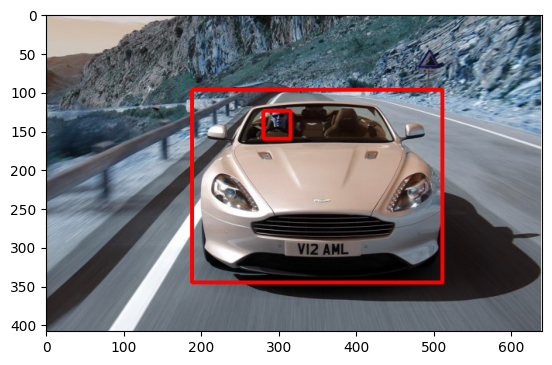

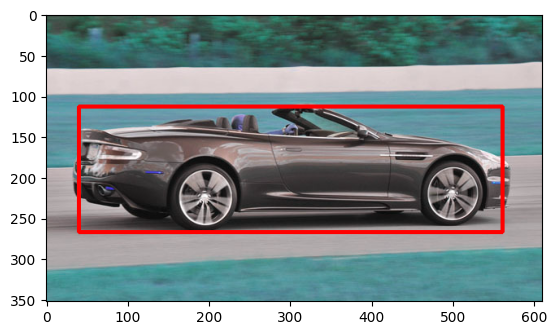

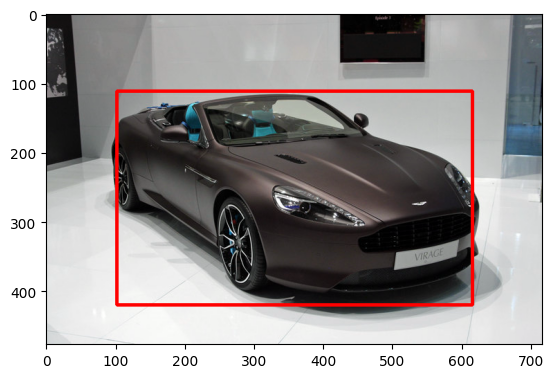

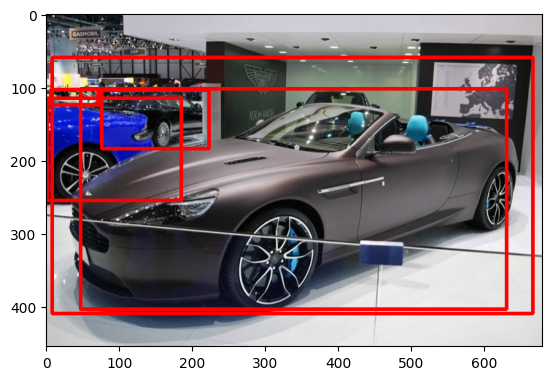

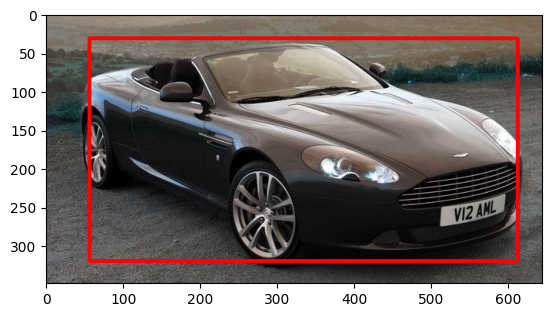

In [ ]:
# images from train folder

colors = np.random.randint(0, 255, (100, 3))

for j in range(5):
  # Detect objects
  image_name = train.loc[j, "Image_File"]
  image = cv2.imread(image_name)

  height = image.shape[0]
  width = image.shape[1]

  # Create black image
  black_image = np.zeros((height, width, 3), np.uint8)
  black_image[:] = (100, 100, 0)

  detect_objects = cv2.dnn.blobFromImage(image, swapRB=True)
  net.setInput(detect_objects)

  boxes, masks = net.forward(["detection_out_final", "detection_masks"])
  count_detection = boxes.shape[2]

  for i in range(count_detection):
    box_object = boxes[0, 0, i]
    class_id = box_object[1]
    score = box_object[2]
    if score < 0.5:
      continue

    # Get box Coordinates for each object
    a1 = int(box_object[3] * width)
    b1 = int(box_object[4] * height)
    a2 = int(box_object[5] * width)
    b2 = int(box_object[6] * height)

    roi = black_image[b1: b2, a1: a2]
    roi_height, roi_width, _ = roi.shape

    # Get the mask
    mask = masks[i, int(class_id)]
    mask = cv2.resize(mask, (roi_width, roi_height))
    _, mask = cv2.threshold(mask, 0.5, 255, cv2.THRESH_BINARY)

    cv2.rectangle(image, (a1, b1), (a2, b2), (255, 0, 0), 3)

    # Get mask coordinates
    contours, _ = cv2.findContours(np.array(mask, np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    color = colors[int(class_id)]
    for cnt in contours:
      cv2.fillPoly(roi, [cnt], (int(color[0]), int(color[1]), int(color[2])))

  plt.imshow(image)
  plt.show()

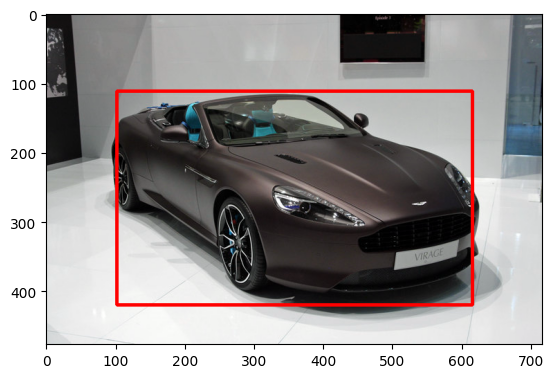

In [ ]:
# Detect objects
i = 2
image_name = train.loc[i, "Image_File"]
image = cv2.imread(image_name)

height = image.shape[0]
width = image.shape[1]

  # Create black image
black_image = np.zeros((height, width, 3), np.uint8)
black_image[:] = (100, 100, 0)

detect_objects = cv2.dnn.blobFromImage(image, swapRB=True)
net.setInput(detect_objects)

boxes, masks = net.forward(["detection_out_final", "detection_masks"])
count_detection = boxes.shape[2]

for i in range(count_detection):
  box_object = boxes[0, 0, i]
  class_id = box_object[1]
  score = box_object[2]
  if score < 0.5:
    continue

    # Get box Coordinates for each object
  a1 = int(box_object[3] * width)
  b1 = int(box_object[4] * height)
  a2 = int(box_object[5] * width)
  b2 = int(box_object[6] * height)

  roi = black_image[b1: b2, a1: a2]
  roi_height, roi_width, _ = roi.shape

    # Get the mask
  mask = masks[i, int(class_id)]
  mask = cv2.resize(mask, (roi_width, roi_height))
  _, mask = cv2.threshold(mask, 0.5, 255, cv2.THRESH_BINARY)

  cv2.rectangle(image, (a1, b1), (a2, b2), (255, 0, 0), 3)

    # Get mask coordinates
  contours, _ = cv2.findContours(np.array(mask, np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  color = colors[int(class_id)]
  for cnt in contours:
    cv2.fillPoly(roi, [cnt], (int(color[0]), int(color[1]), int(color[2])))

plt.imshow(image)

### Feature Prediction

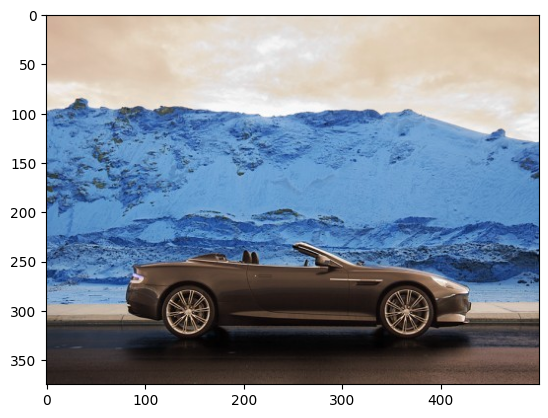

In [ ]:
# Using RCNN trained model

from tensorflow.keras.models import load_model

loaded_model = load_model('/content/rcnn_model')
loaded_model.load_weights("/content/rcnn_weights.h5")

path = test.loc[20, "Image_File"]
img = cv2.imread(path)

plt.imshow(img)
img = np.expand_dims(img, axis=0)



### Faster RCNN Detect and Label

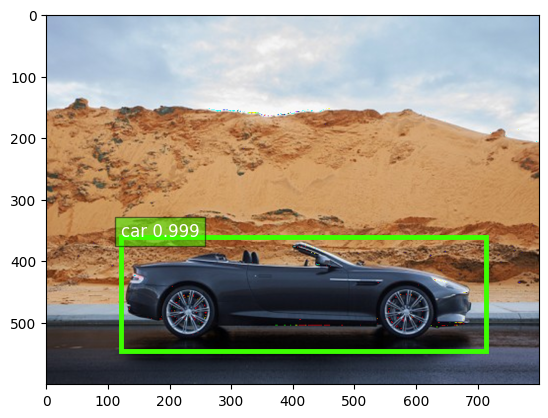

In [ ]:
#Object detection using faster RCNN
# import libraries
import cv2          #for image processing
import numpy as np
from matplotlib import pyplot as plt      #for plotting purposes                        #matrix operations
import mxnet as mx
import gluoncv
from gluoncv import model_zoo, data, utils
from google.colab.patches import cv2_imshow   #plotting in google colab, equivalent of cv2.imshow

net = model_zoo.get_model('faster_rcnn_resnet50_v1b_voc', pretrained=True)

def detect_and_label(rgb_frame):
    final_array = mx.nd.array(rgb_frame)        # convert the video frame into mxnet numpy array
    x, img = gluoncv.data.transforms.presets.rcnn.transform_test(final_array)     # transform the array for model input shape
    class_IDs, scores, bounding_boxes = net(x)            # get the class Ids, confidence scores and bounding boxes by passing the array through the model
    ax = utils.viz.plot_bbox(img, bounding_boxes[0], scores[0],
                             class_IDs[0], class_names=net.classes) # create an axis object with the information and respective classes
    # plt.rcParams['figure.figsize'] = [80, 50]
    plt.show(block=False)
    plt.pause(0.0001)
    plt.close()       # I've plotted it this way to stop the plt.show from blocking the next video frame so you can view results
                      # in real time. However, this will depend on how much fps your system supports.




#############################################
image_name = test.loc[20, "Image_File"]
image = cv2.imread(image_name)
rgb_frame = image[:, :, ::-1]
detect_and_label(rgb_frame)